# Amazon Books Pattern Analysis (2009- 2019)

In [1]:
# importing libraries for web scraping and EDA
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data on the top 50 bestselling books fron 2009 to 2019 which was downloaded fron kaggle
#using this link https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/download?datasetVersionNumber=1

best_books= pd.read_csv("bestsellers with categories.csv")
best_books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
 #webscraping amazon website to retrive data on books displayed for sales from 2009_2019
def get_books(year):
        
    books_url =f"https://www.amazon.com/gp/bestsellers/{year}/books"

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.0.0 Safari/537.36",
               "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(books_url,headers = headers)
    soup =BeautifulSoup(page.content, 'html.parser')

    #get all books

    books = soup.find_all(id = 'gridItemRoot')
    
    return books


In [4]:
def get_dir(book,year): 

    try:
        price = book.find('span',class_="_cDEzb_p13n-sc-price_3mJ9Z").text[1:]
    except Exception as e:
        price = np.nan
    try:
        ranks = book.find('span', class_='zg-bdg-text').text[1:]
    except Exception as e:
        ranks = np.nan
    try:
        title = book.find('div',class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text
    except Exception as e:
        title = np.nan
    try:
        ratings= book.find('span',class_="a-icon-alt").text[:3] 
    except Exception as e:
        ratings = np.nan
    try:
        no_of_reviews  = book.find('span',class_="a-size-small").text
    except Exception as e:
        no_of_reviews = np.nan
    try:
        author = book.find('a',class_="a-size-small a-link-child").text
    except Exception as e:
        author = np.nan
    year = year
    return [price,ranks,title,no_of_reviews,ratings,author, year]
    
    

In [5]:
def get_data(books, year):
    data = [get_dir(book,year) for book in books]
    return data

In [6]:
def get_dict(data,year):


    df_list = []       

    for book in data:

        df_list.append( {'year': book[6],
                         'price':book[0],
                         'ranks':book[1],
                         'title':book[2],
                         'no_of_reviews':book[3],
                         'ratings':book[4],
                         'author':book[5]})
    return df_list


In [7]:
def df(year):
    y = get_dict(get_data(get_books(year),year), year)
    return y

In [8]:
#saving the data into a csv file for individual years
csv_2009 = pd.DataFrame(df(2009), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2010 = pd.DataFrame(df(2010), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2011 = pd.DataFrame(df(2011), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2012 = pd.DataFrame(df(2012), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2013 = pd.DataFrame(df(2013), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2014 = pd.DataFrame(df(2014), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2015 = pd.DataFrame(df(2015), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2016 = pd.DataFrame(df(2016), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2017 = pd.DataFrame(df(2017), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2018 = pd.DataFrame(df(2018), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])
csv_2019 = pd.DataFrame(df(2019), columns = ['year',
                         'price',
                         'ranks',
                         'title',
                         'no_of_reviews',
                         'ratings',
                         'author'])

In [9]:
# merging the individual year data into one 
books= pd.concat([csv_2009,csv_2010,csv_2011,csv_2012,csv_2013,csv_2014,csv_2015,csv_2016,csv_2017,csv_2018,csv_2019])
books

,year,price,ranks,title,no_of_reviews,ratings,author
0,2009,10.52,1,The Lost Symbol,"16,130",4.4,Dan Brown
1,2009,10.43,2,The Shack: Where Tragedy Confronts Eternity,"23,399",4.7,William P. Young
2,2009,9.93,3,Liberty and Tyranny: A Conservative Manifesto,"5,037",4.8,Mark R. Levin
3,2009,14.30,4,"Breaking Dawn (The Twilight Saga, Book 4)","16,923",4.7,Stephenie Meyer
4,2009,9.99,5,Going Rogue: An American Life,"1,572",4.6,Sarah Palin
...,...,...,...,...,...,...,...
25,2019,16.30,26,Howard Stern Comes Again,"7,961",4.5,Howard Stern
26,2019,5.90,27,Guts: A Graphic Novel,"13,991",4.8,Raina Telgemeier
27,2019,8.32,28,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,NaN
28,2019,21.52,29,Harry Potter and the Goblet of Fire: The Illus...,"24,896",4.9,J. K. Rowling


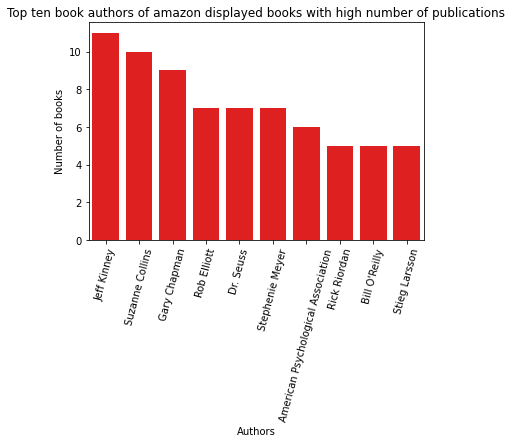

In [10]:
#observing the trend of authors for displayed books
authors=books.iloc[1:,6]
d=authors.value_counts()

sns.barplot(x=d.iloc[:10].index,y=d.iloc[:10].values,color='red')
plt.xlabel('Authors')
plt.ylabel('Number of books')
plt.xticks(rotation=75)
plt.title('Top ten book authors of amazon displayed books with high number of publications')
plt.show()

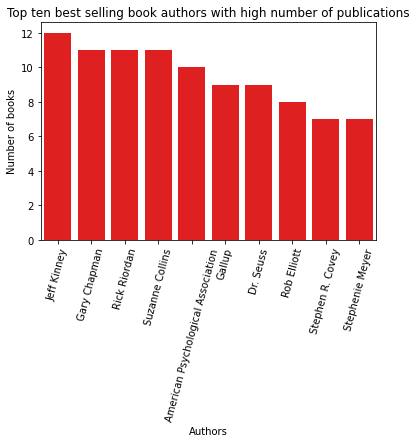

In [11]:
#observing the trend of authors for bestselling books
authors_best=best_books.iloc[1:,1]
d=authors_best.value_counts()

sns.barplot(x=d.iloc[:10].index,y=d.iloc[:10].values,color='red')
plt.xlabel('Authors')
plt.ylabel('Number of books')
plt.xticks(rotation=75)
plt.title('Top ten best selling book authors with high number of publications')
plt.show()

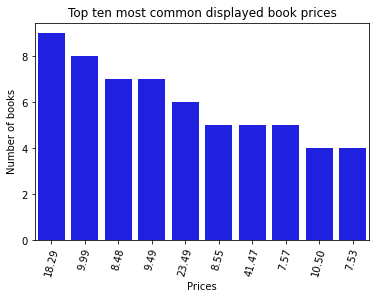

In [12]:
#observing the trend of prices for displayed books
price=books.iloc[1:,1]
f=price.value_counts()

sns.barplot(x=f.iloc[:10].index,y=f.iloc[:10].values,color='blue')
plt.xlabel('Prices')
plt.ylabel('Number of books')
plt.xticks(rotation=75)
plt.title('Top ten most common displayed book prices')
plt.show()

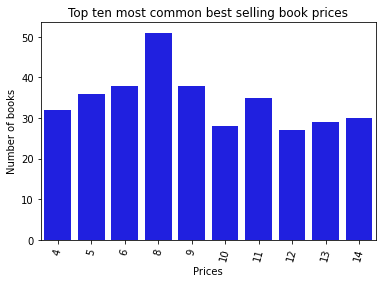

In [13]:
#observing the trend of prices for bestselling books
price_best=best_books.iloc[1:,4]
g=price_best.value_counts()

sns.barplot(x=g.iloc[:10].index,y=g.iloc[:10].values,color='blue')
plt.xlabel('Prices')
plt.ylabel('Number of books')
plt.xticks(rotation=75)
plt.title('Top ten most common best selling book prices')
plt.show()

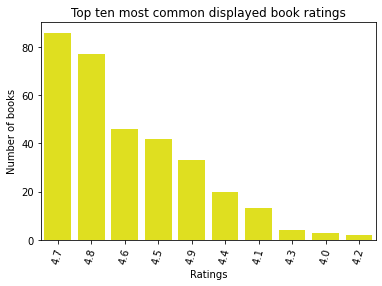

In [14]:
#observing the trend of ratings for displayed books
rating=books.iloc[1:,5]
h=rating.value_counts()

sns.barplot(x=h.iloc[:10].index,y=h.iloc[:10].values,color='yellow')
plt.xlabel('Ratings')
plt.ylabel('Number of books')
plt.xticks(rotation=75)
plt.title('Top ten most common displayed book ratings')
plt.show()

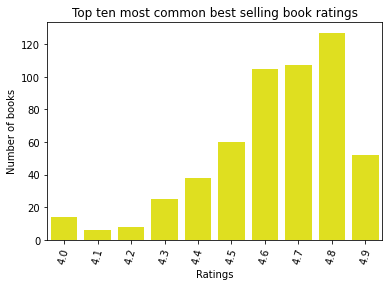

In [15]:
#observing the trend of ratings for bestselling books
rating_best=best_books.iloc[1:,2]
j=rating_best.value_counts()

sns.barplot(x=j.iloc[:10].index,y=j.iloc[:10].values,color='yellow')
plt.xlabel('Ratings')
plt.ylabel('Number of books')
plt.xticks(rotation=75)
plt.title('Top ten most common best selling book ratings')
plt.show()